## Resume Screening Project :

- This project demonstrates how we can extract text from a resume.
- And then assign a category to it for easy HR management of resumes.
- The method used here is Multiclass Classification.


### Data Fetching :

**Using Api :**
- if you're inside a conda env :
  - paste !conda install kagglehub -y
- if you want to install using pip:
  - pip install kagglehub
 
then paste the following command:
```
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = './data/'
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "gauravduttakiit/resume-dataset",
    file_path
)

print('first 5 records :', df.head())
```

**Manual Download :**
- click on this -> [Dataset](https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset)
- And download the `UpdatedResumeDataset.csv` from there.

In [24]:
# necessary imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [2]:
# load the dataset
df = pd.read_csv('./data/UpdatedResumeDataset.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
# number of samples
df.shape

(962, 2)

In [4]:
# labels
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

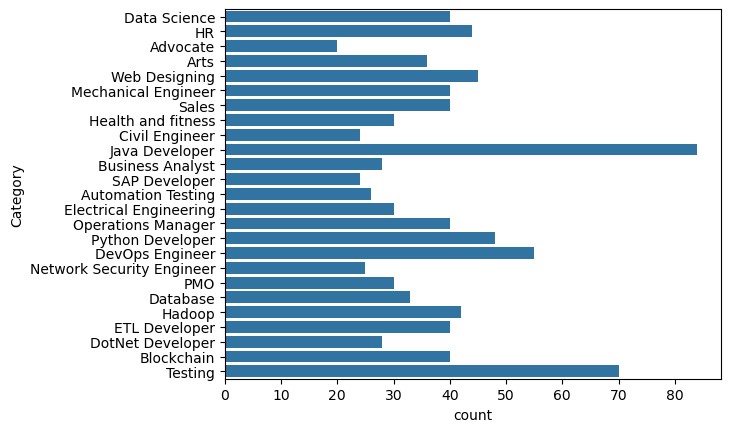

In [5]:
sns.countplot(df['Category'])
plt.show();

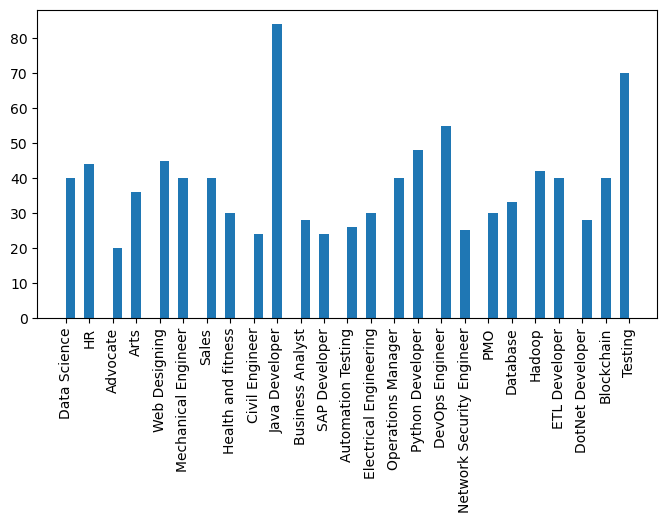

In [6]:
# visualize using just pandas
df['Category'].hist(grid = False, bins = 60, xrot = 90, figsize = (8, 4));

As we can see that we have an imbalanced data so we need further evaluation than just accuracy.

### Explore Resume Text :

In [7]:
# explore the dataset
text = df.iloc[0]['Resume']
text

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

As we can see that we first need to clean the data in order for efficient classification.

### Clean Data :
1. remove URL's
2. remove punctuations
3. remove hashtags
4. remove mentions
5. remove special letters

In [8]:
# clean the data
import re

def clean_data(text):
    # remove hyperlinks
    text = re.sub(r'http\S+\s', ' ', text)
    # remove special sequence
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'RT|cc', ' ', text)
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    # remove mentions and hashtags
    text = re.sub(r'@\S+\s', ' ', text)
    text = re.sub(r'#\S+\s', ' ', text)
    # remove . and - if they are not between words
    text = re.sub(r'(?<!\w)[^\w\s.-]+|[^\w\s.-]+(?!\w)', '', text)
    # remove full stops
    text = re.sub(r'(?<=\w)\.(?!\w)', '', text)
    # remove hyphens
    text = re.sub(r'(?<=\w)-(?!\w)|(?<!\w)-|-(?!\w)', '', text)
    # lower text
    text = text.lower()

    return text

In [9]:
clean_data(text)

'skills  programming languages python pandas numpy scipy scikit-learn matplotlib sql java javascript/jquery  machine learning regression svm na  ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3.js dc.js plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learning.education details data science assurance associate data science assurance associate  ernst  young llp skill details javascript exprience  24 months jquery exprience  24 months python exprience  24 monthscompany details company  ernst  young llp description  fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a

In [10]:
# apply that function on dataset
df['Resume'] = df['Resume'].apply(clean_data)

In [11]:
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details may 2013 to may 2017 b.e uit...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad haryan...


As you can see text has been cleaned now.

In [12]:
# convert categories into numerical label
label_enc = LabelEncoder()
df['target'] = label_enc.fit_transform(df['Category'])
df.head()

,Category,Resume,target
0,Data Science,skills programming languages python pandas nu...,6
1,Data Science,education details may 2013 to may 2017 b.e uit...,6
2,Data Science,areas of interest deep learning control system...,6
3,Data Science,skills r python sap hana table...,6
4,Data Science,education details mca ymcaust faridabad haryan...,6


In [13]:
label_enc.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [14]:
# split the data into train and test split
df_train, df_test, y_train, y_test = train_test_split(
    df['Resume'],df['target'], test_size = 0.1)

In [15]:
# vectorize the inputs
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorizer.fit(df_train)
X_train = vectorizer.transform(df_train)
X_test = vectorizer.transform(df_test)

Now our inputs and targets are in numerical format all we have to do is to train a model.

In [16]:
X_train.shape, X_test.shape

((865, 7355), (97, 7355))

In [17]:
y_train.shape, y_test.shape

((865,), (97,))

### Model Training :

In [18]:
# instantiate a model
model = KNeighborsClassifier()

# train a model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# check accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print('train acc : ', round(train_acc, 6)*100, '%')
print('test acc : ', round(test_acc, 6)*100, '%')

train acc :  99.0751 %
test acc :  100.0 %


In [22]:
# since our data is imbalance check other metrics too
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'weighted')
print('F1 Score : ', f1)

F1 Score :  1.0


In [39]:
# check confusion matric
labels = list(range(len(label_enc.classes_)))
cm = confusion_matrix(y_test, y_pred, labels = labels)
def plot_cm(cm, label_enc):
    classes = label_enc.classes_
    data = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize = (8, 6))
    ax = sns.heatmap(data, fmt = 'g', annot = True, cmap = 'Blues')
    plt.xlabel = 'predicted'
    plt.ylabel = 'actual'
    plt.title = 'Confusion Matrix'
    plt.show();

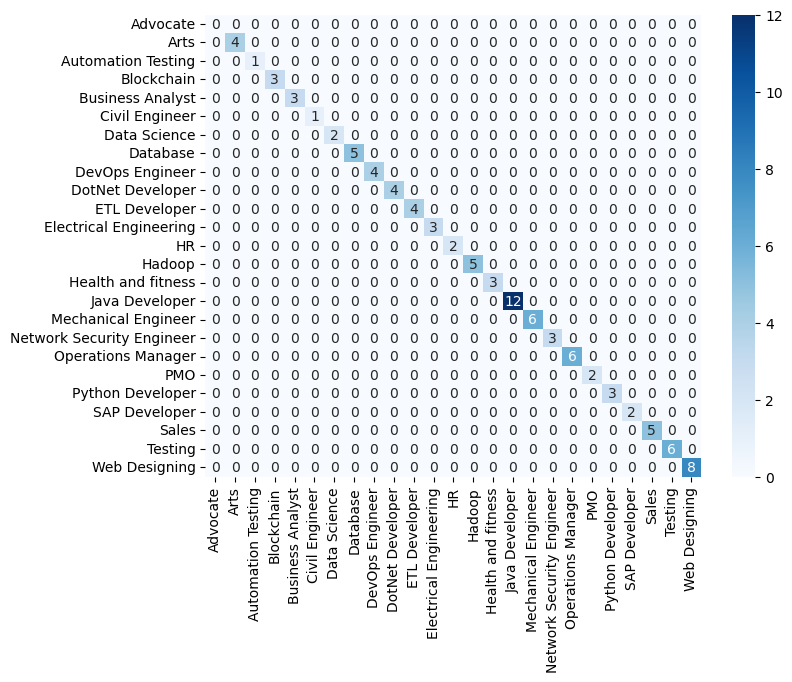

In [40]:
plot_cm(cm, label_enc)

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

df = pd.read_csv('./data/UpdatedResumeDataset.csv')
df['Resume'] = df['Resume'].apply(clean_data)
df['target'] = label_enc.fit_transform(df['Category'])
X = vectorizer.fit_transform(df['Resume'])
y = df['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')

print("F1 scores:", scores)
print("Mean F1 score:", scores.mean())


F1 scores: [0.98391654 0.97756806 0.97354403 0.9792794  0.97283266]
Mean F1 score: 0.9774281387669064


In [41]:
wrong = (y_pred != y_test)
print("Misclassified samples:", sum(wrong))

Misclassified samples: 0


### Result:

- Our model proves to be very consistent and stable with correct answers.

### Exporting Model and Matrix:

- we export our model for it to be consistent on every machine
- and we also export our tfidf matrix so that we don't have to use the dataset anymore
- we will also have to export the index2target dictionary to correctly identify the model's prediction.

In [46]:
index2target = {k: v for k, v in enumerate(label_enc.classes_)}
index2target

{0: 'Advocate',
 1: 'Arts',
 2: 'Automation Testing',
 3: 'Blockchain',
 4: 'Business Analyst',
 5: 'Civil Engineer',
 6: 'Data Science',
 7: 'Database',
 8: 'DevOps Engineer',
 9: 'DotNet Developer',
 10: 'ETL Developer',
 11: 'Electrical Engineering',
 12: 'HR',
 13: 'Hadoop',
 14: 'Health and fitness',
 15: 'Java Developer',
 16: 'Mechanical Engineer',
 17: 'Network Security Engineer',
 18: 'Operations Manager',
 19: 'PMO',
 20: 'Python Developer',
 21: 'SAP Developer',
 22: 'Sales',
 23: 'Testing',
 24: 'Web Designing'}

In [49]:
# exporting
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

### VS Code Pre-Processing :
only works if you already have
- my_resume (text extracted from a resume)
- so don't run it here run it in vscode.
- with the streamlit code integrated version.

In [ ]:
import pickle
import re

def clean_data(text):
    # remove hyperlinks
    text = re.sub(r'http\S+\s', ' ', text)
    # remove special sequence
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'RT|cc', ' ', text)
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    # remove mentions and hashtags
    text = re.sub(r'@\S+\s', ' ', text)
    text = re.sub(r'#\S+\s', ' ', text)
    # remove . and - if they are not between words
    text = re.sub(r'(?<!\w)[^\w\s.-]+|[^\w\s.-]+(?!\w)', '', text)
    # remove full stops
    text = re.sub(r'(?<=\w)\.(?!\w)', '', text)
    # remove hyphens
    text = re.sub(r'(?<=\w)-(?!\w)|(?<!\w)-|-(?!\w)', '', text)
    # lower text
    text = text.lower()

    return text

index2target = {0: 'Advocate', 1: 'Arts', 2: 'Automation Testing',
 3: 'Blockchain', 4: 'Business Analyst', 5: 'Civil Engineer',
 6: 'Data Science', 7: 'Database', 8: 'DevOps Engineer', 9: 'DotNet Developer',
 10: 'ETL Developer', 11: 'Electrical Engineering', 12: 'HR', 13: 'Hadoop',
 14: 'Health and fitness', 15: 'Java Developer', 16: 'Mechanical Engineer',
 17: 'Network Security Engineer', 18: 'Operations Manager', 19: 'PMO',
 20: 'Python Developer', 21: 'SAP Developer', 22: 'Sales', 23: 'Testing', 24: 'Web Designing'}

# import pretrained model
clf = pickle.load(open('model.pkl', 'rb'))

# import pretrained vectorizer
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# clean resume
cleaned_resume = clean_data(my_resume)

# input features 
input_features = vectorizer.transform([cleaned_resume])

# predict and id
pred = clf.predict(input_features[0])

# find category
predicted_category = index2target.get(pred, 'Unknown')

print('Predicted Category :', predicted_category)